EDA and data preprocessing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
# General settings 
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [3]:
# Getting dataset
df_train = pd.read_csv('Data/training_sample.csv')

In [4]:
# First look at the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [5]:
df_train.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1


In [6]:
# Missing values analysis
df_train.isna().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [7]:
# Duplicate values
df_train.duplicated().sum()

0

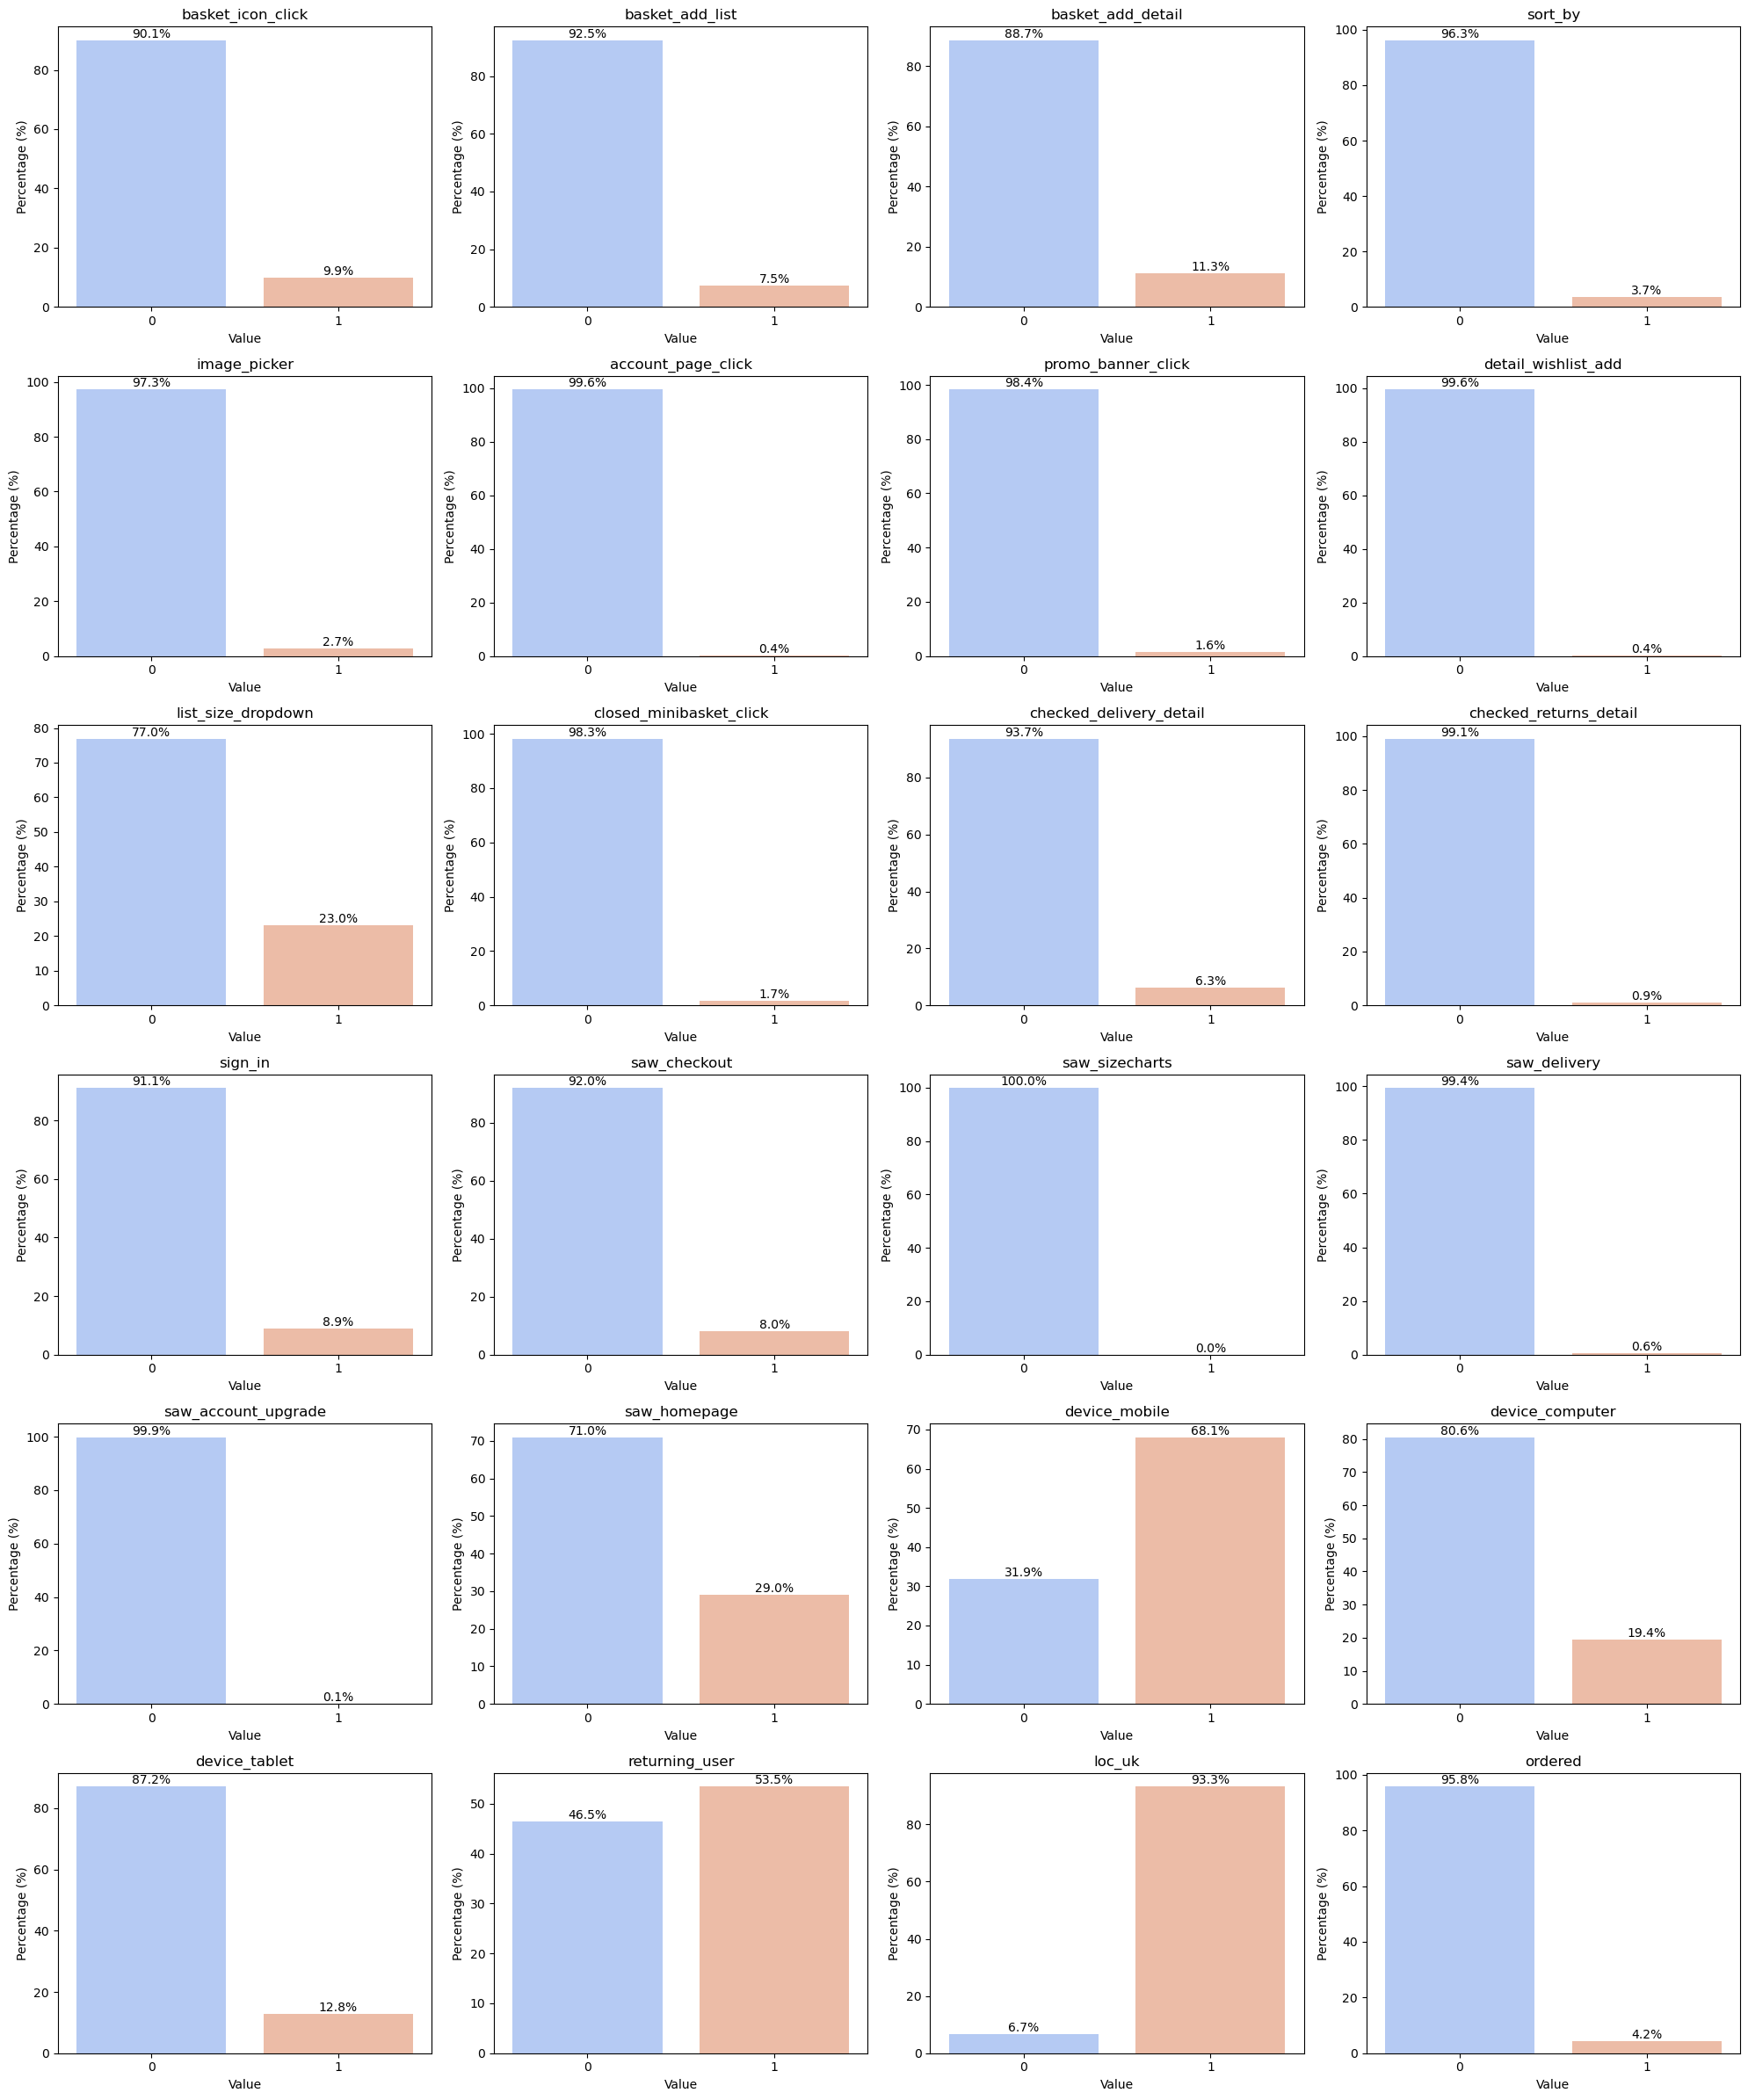

In [8]:
# % bar chart grid for each variable to examine outliers, error data values and feature distribution

# Intiger columns list 
int_columns = [col for col in df_train.columns if col not in ['UserID']]

# Chart grid settings
n_cols = 4  
n_rows = int(np.ceil(len(int_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating plots
for i, col in enumerate(int_columns):
    # % for each value (0/1)
    percent_data = df_train[col].value_counts(normalize=True) * 100
    sns.barplot(
        x=percent_data.index,
        y=percent_data.values,
        ax=axes[i],
        palette="coolwarm",
    )
    # Labels
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_ylabel("Percentage (%)", fontsize=10)
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.1f}%", 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha="center", va="bottom", fontsize=10)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(len(int_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [9]:
# Descriptive statistics for each variable
df_train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,0.062874,0.009179,0.088810,0.080085,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,0.242737,0.095365,0.284469,0.271426,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data preparation summary. In the analyzed dataset:
- All variables have correctly assigned data types.
- There are no duplicates in the dataset.
- There are no missing values in the dataset.
- All features are dichotomous (an event either occurred or did not occur). Therefore, the variables do not require scaling; however, the dichotomous nature of the features limits the types of algorithms that can be used for clustering and prediction.
- There are no outliers or erroneous values in the dataset.
- Analysis of the frequency distribution of the feature categories indicates significant disparities in this area. In the vast majority of cases, the '0' category (the event did not occur) dominates. In the case of the variable whose categories we aim to predict (along with the probability of belonging to a given category), 95.8% of website users did not make a purchase, and only 4.2% of site visits resulted in a purchase. These disparities must be taken into account when building and interpreting the classification and predictive model.
- Based only on the analysis of the frequency distributions of individual variables, we can additionally conclude that:
    - Significantly more users add products to the basket (7.5%) and see checkout page (8%) than ultimately purchase the products (4.2%). It is worth checking if there are barriers during the purchase finalization stage that discourage users from buying.
    - The vast majority of users access the company website using a mobile device (68.1%). 19.4% use a computer, and 12.8% use a tablet. Therefore, it is particularly important to ensure the quality and usability of the site on mobile devices.
    - As many as 53.5% of users are returning visitors to the website. It is important to verify whether returning users have been included in loyalty programs.
    - Only 8.9% of website users sign in during their visit. Efforts should be made to increase the number of such users through targeted marketing and loyalty actions.


In [10]:
# Target variable and modeling features
X_columns_df = df_train[[col for col in df_train.columns if col not in ['UserID', 'ordered']]]

y_column_df = df_train['ordered']

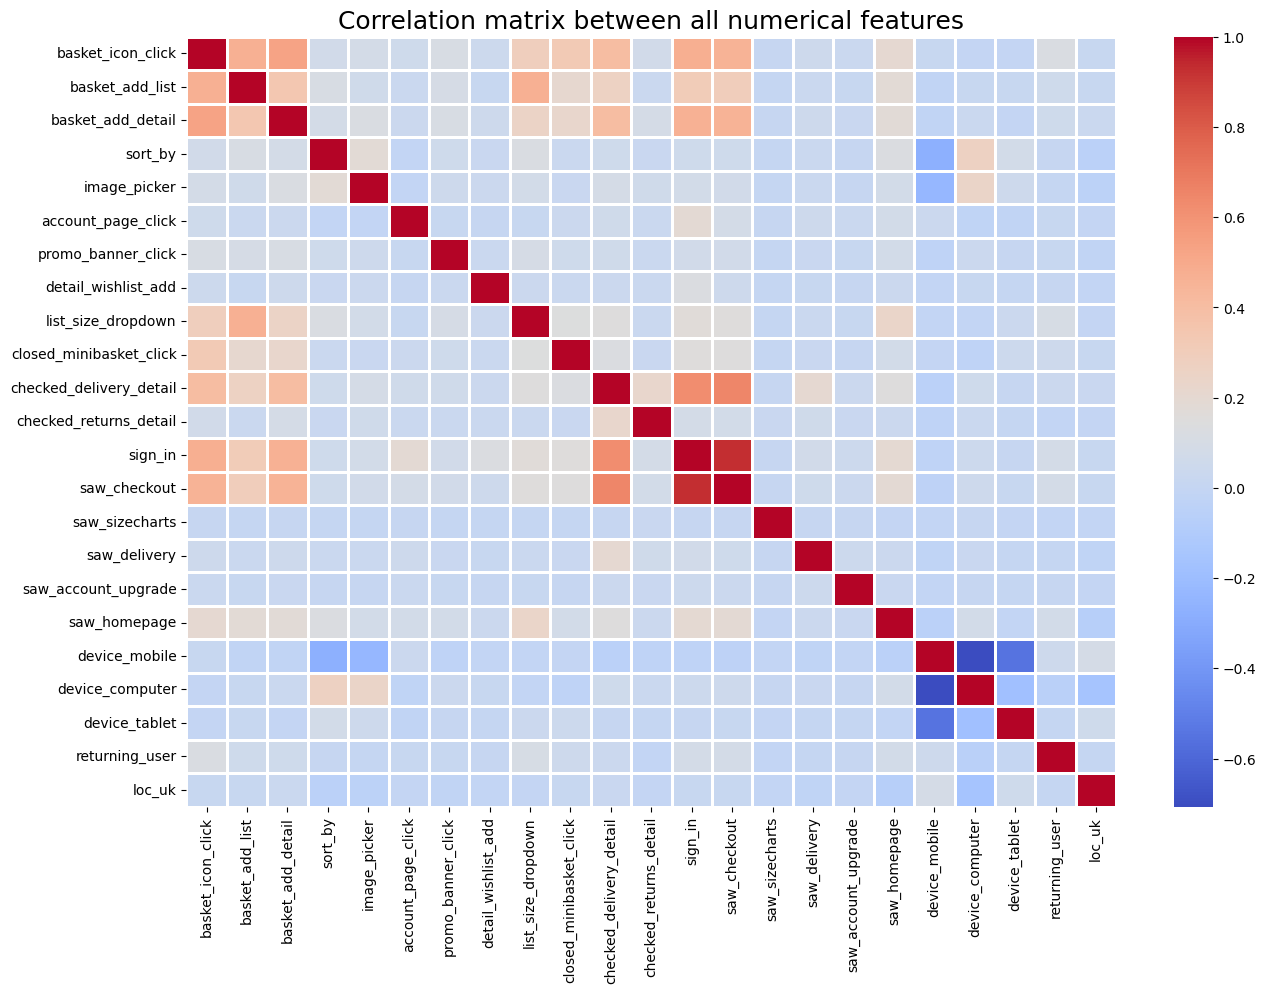

In [11]:
# linear correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(X_columns_df.corr(), cmap='coolwarm', linewidths=2)
plt.title('Correlation matrix between all numerical features', fontsize=18)
plt.show()

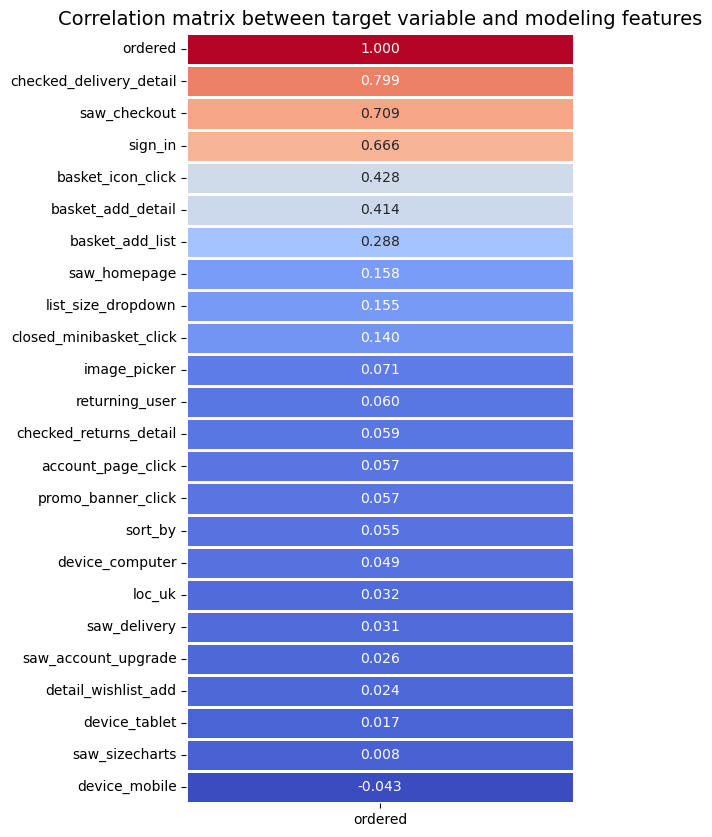

In [12]:
# linear correlation between target variable ('ordered') and other user online behaviour
numeric_df = df_train.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

ordered_correlation = correlation_matrix['ordered'].sort_values(ascending=False)

plt.figure(figsize=(5, 10))
sns.heatmap(ordered_correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=2, cbar=False, fmt='.3f')
plt.title('Correlation matrix between target variable and modeling features', fontsize=14)
plt.show()


The highest linear correlation occurs between the following features:
- Sign-in and Checkout Page - strongest positive correlation: Checkout pages are the final step in online shopping, where customers provide payment and shipping information. This step is crucial in converting website browsers into actual buyers. It also plays a significant role in shaping their shopping experience. Since there is a strong positive correlation between visiting this page and signing in, the webstore's CRM department knows details (e.g., contact information) about users who viewed the checkout page but didn't make a purchase, enabling them to react to these situations effectively.

- Device Computer and Device Mobile - strongest negative correlation: When you use a computer, you don't use mobile devices simultaneously. But do mobile and computer users have the same positive experience with the website?

- The strongest positive correlation with the target variable ('ordered') occurs for 'checked delivery detail' (0.8). A high correlation coefficient indicates that in about 80% of cases, the variable values are consistent, which means that people who make purchases often check delivery details. It might be beneficial to ensure that the information about delivery conditions displayed during the purchase process is more detailed, understandable, and accessible.

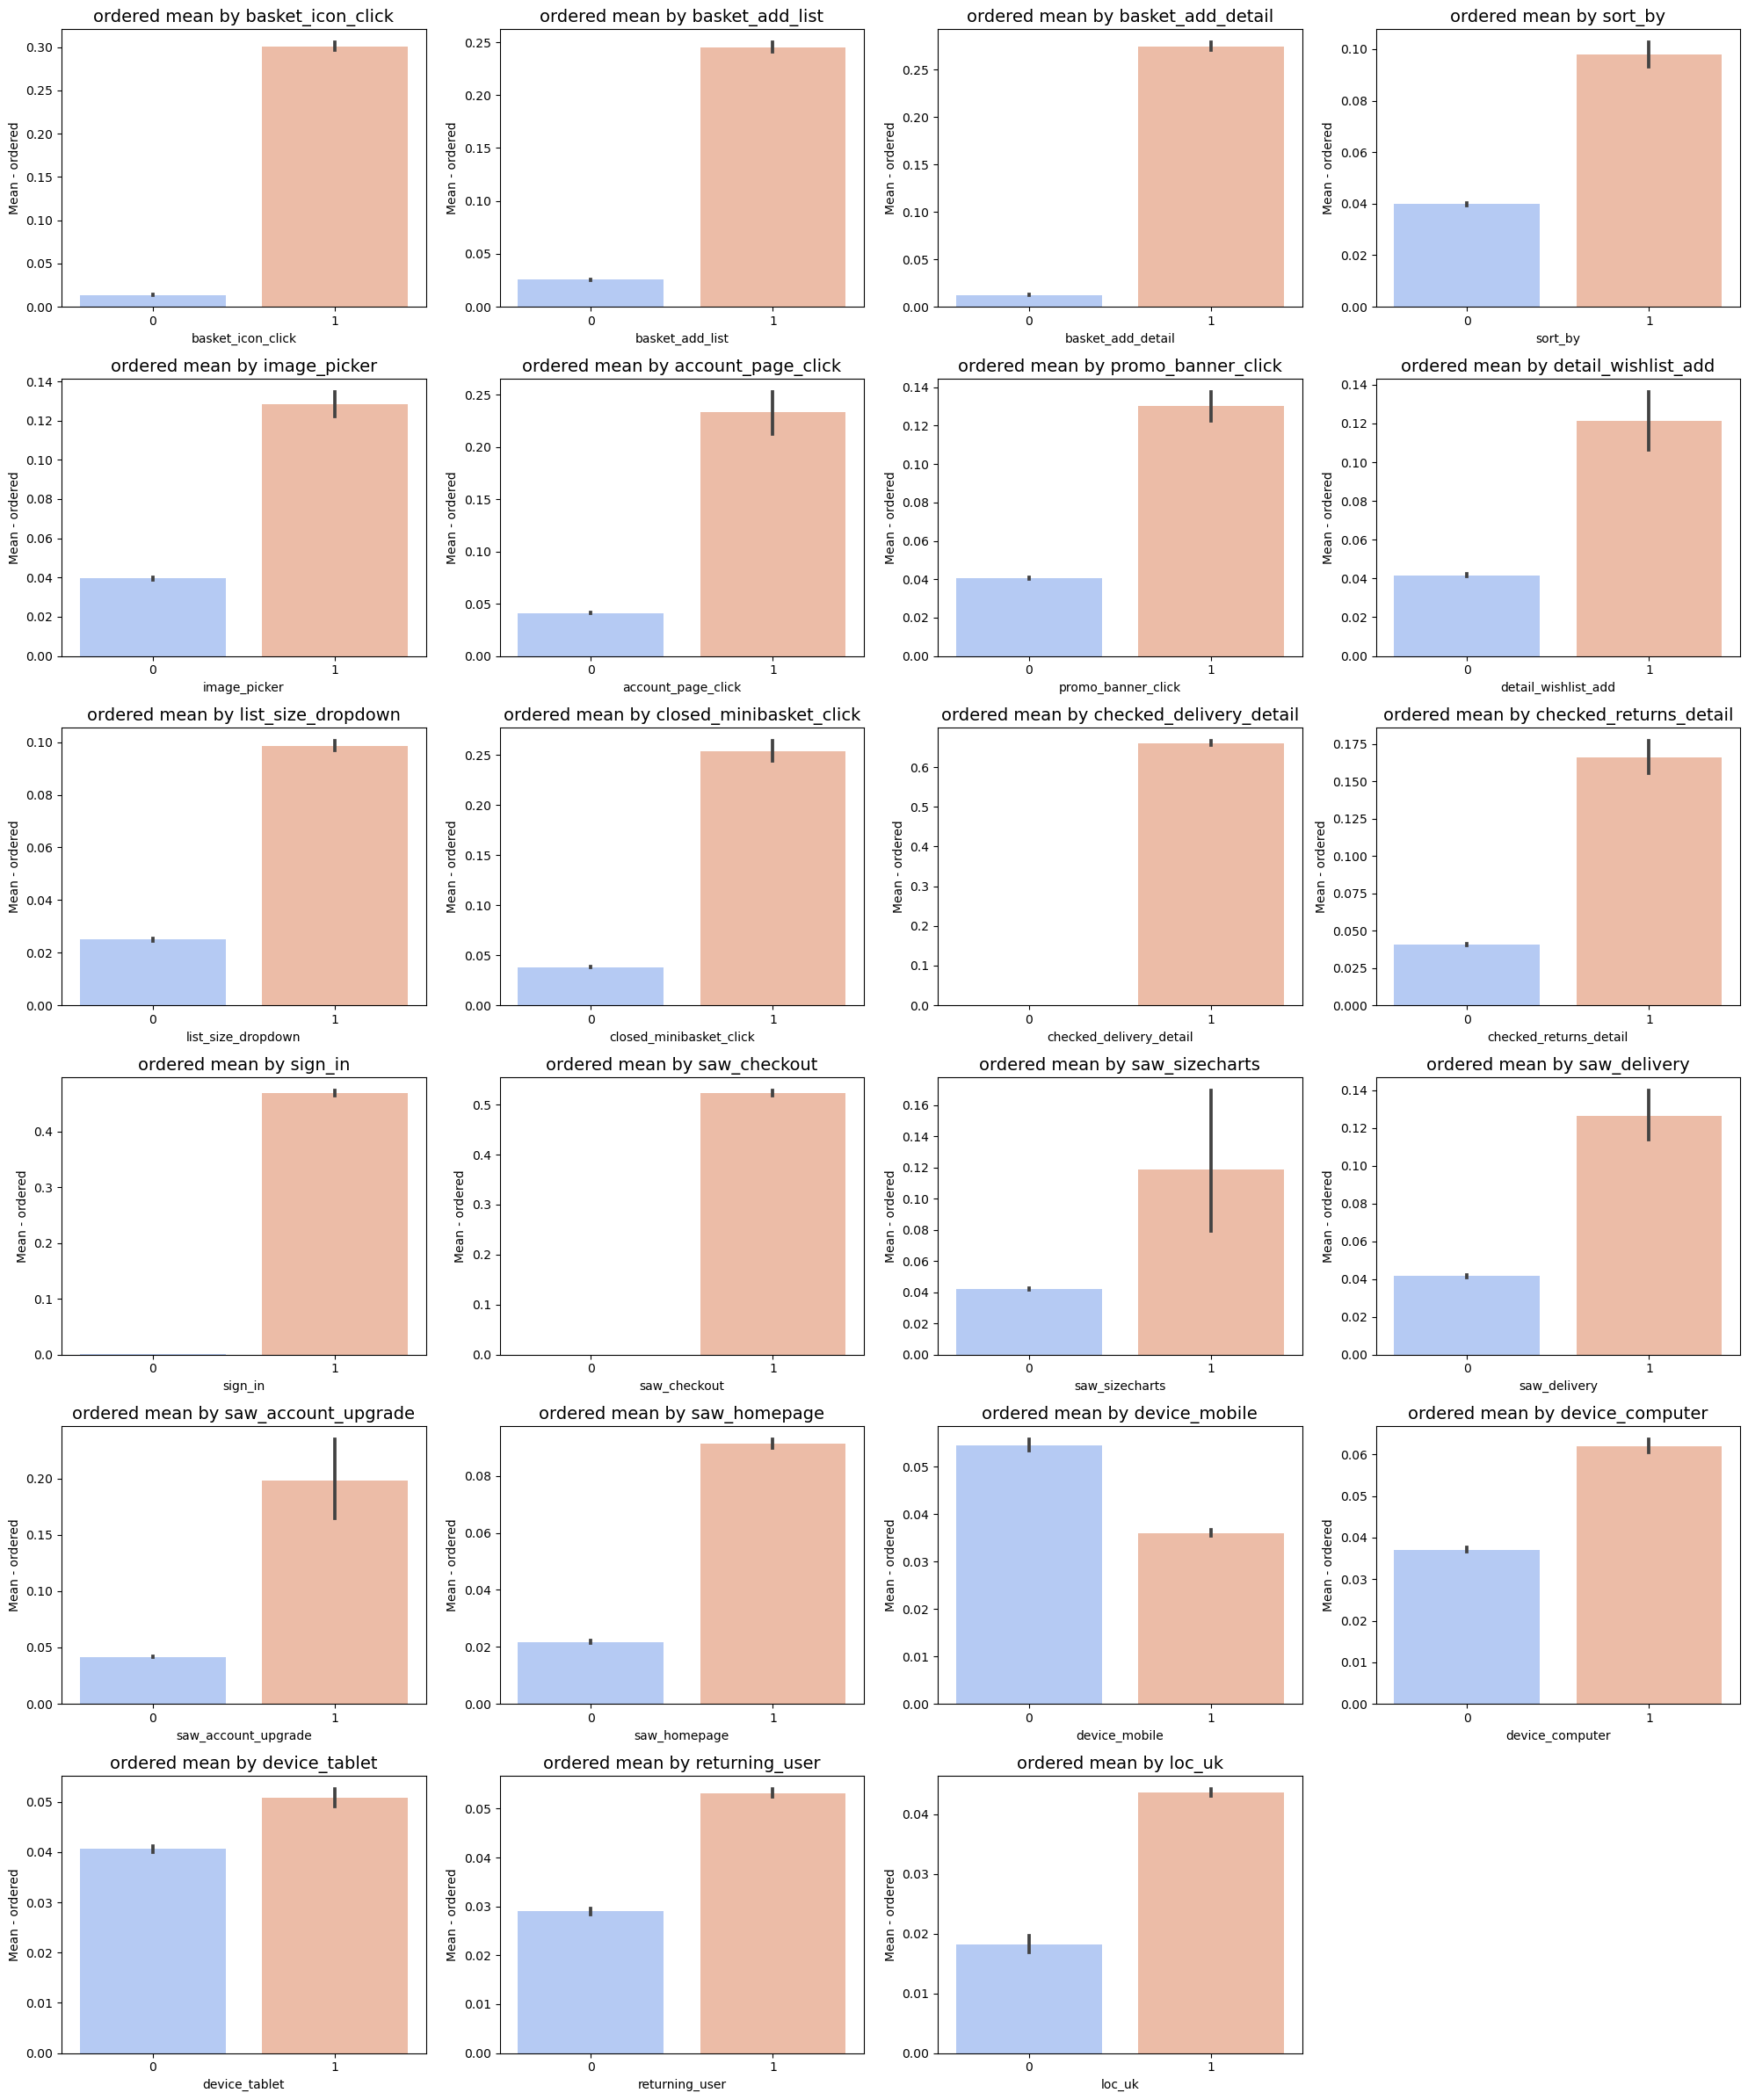

In [14]:
# Mean bar chart grid for each variable to examine differences between buyers and non-buyers group. The line in the bars indicates the 95% confidence interval

X_columns = [col for col in df_train.columns if col not in ['UserID', 'ordered']]

n_cols = 4 
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(X_columns):
    sns.barplot(
        x=col, 
        y='ordered', 
        data=df_train, 
        ax=axes[i], 
        palette='coolwarm',
        ci=95  
    )
    axes[i].set_title(f'ordered mean by {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Mean - ordered')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
"""
U Manna-Whitneya test (non-parametric statistical test used to compare differences between two independent groups 
when the dependent variable is either ordinal or continuous, but not normally distributed).
It evaluates whether there is a significant difference in the medians of the two groups.
"""

# Feature list
X_columns = [col for col in df_train.columns if col not in ['UserID', 'ordered']]

# Median comparison of 'ordered' across each independent feature
mann_whitney_results = {}

for col in X_columns:
    # Divide 'ordered' by groups of the current feature
    groups = df_train.groupby(col)['ordered']
    
    # Ensure there are exactly two groups to compare
    if len(groups) == 2:
        group_1, group_2 = groups.apply(list)  # Extract two groups
        u_stat, p_value = mannwhitneyu(group_1, group_2, alternative='two-sided')
        mann_whitney_results[col] = {'U_stat': u_stat, 'p_value': p_value}

# Convert results to DataFrame
results_df = pd.DataFrame(mann_whitney_results).T
results_df.sort_values('p_value', inplace=True)  # Sort by p-value
results_df['significant'] = results_df['p_value'] < 0.05  # Mark significant results

# Display results
print(results_df)


                               U_stat        p_value  significant
basket_icon_click        6.601527e+09   0.000000e+00         True
saw_homepage             1.986390e+10   0.000000e+00         True
saw_checkout             3.640083e+09   0.000000e+00         True
sign_in                  4.456514e+09   0.000000e+00         True
returning_user           2.517234e+10   0.000000e+00         True
checked_delivery_detail  2.080540e+09   0.000000e+00         True
closed_minibasket_click  1.381444e+09   0.000000e+00         True
list_size_dropdown       1.702943e+10   0.000000e+00         True
checked_returns_detail   8.251598e+08   0.000000e+00         True
promo_banner_click       1.505060e+09   0.000000e+00         True
account_page_click       2.979155e+08   0.000000e+00         True
image_picker             2.458471e+09   0.000000e+00         True
basket_add_detail        7.660879e+09   0.000000e+00         True
basket_add_list          5.581579e+09   0.000000e+00         True
sort_by   

Thanks to the above plot matrix, we can compare the mean values of target variable ('ordered') for two categories of each feature (action taken and not taken). In most cases, these means are higher for those who take action. Thus, such people generally visit more subpages and use more functionalities available on the site. The exception is the variable 'device_mobile', for which the mean value is higher in the group of people who did not use mobile to visit the webside. This may again indicate that people using their phones encounter barriers when making purchases on the site. Additionally, the Mann-Whitney U test (a nonparametric equivalent of the Student's t-test) indicates that there are statistically significant differences in the distributions (median) of target variable ('ordered') between two categories of each feature.

In [5]:
# Distribution of target variable to check class imbalance
df_train['ordered'].value_counts()

ordered
0    436308
1     19093
Name: count, dtype: int64

Classes of the target variable are imbalanced. This must be taken into consideration while conducting predictive modeling.